In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
# download data set: https://drive.google.com/file/d/13nw-uRXPY8XIZQxKRNZ3yYlho-CYm_Qt/view
# info: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

# load data
bankdata = pd.read_csv("/Users/ramna/Downloads/bill_authentication.csv")  

# see the data
bankdata.shape  

# see head
bankdata.head()  

# data processing
X = bankdata.drop('Class', axis=1)  
y = bankdata['Class']  

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

# train the SVM
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

# predictions
y_pred = svclassifier.predict(X_test)  



In [3]:
# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  


# Iris dataset  https://archive.ics.uci.edu/ml/datasets/iris4


[[159   0]
 [  0 116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       116

   micro avg       1.00      1.00      1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [32]:
import pandas as pd
def import_iris():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

    # Assign colum names to the dataset
    colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

    # Read dataset to pandas dataframe
    irisdata = pd.read_csv(url, names=colnames) 

    # process
    X = irisdata.drop('Class', axis=1)  
    y = irisdata['Class']  

    # train
    from sklearn.model_selection import train_test_split  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

    # TODO: Evaluates perfomance of Polynomial Kernel, Gaussian Kernel, and Sigmoid Kernel.

In [33]:
from sklearn import svm, datasets
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [38]:
def polynomial_kernel():
    
    svclassifier = SVC(kernel='poly', degree=8)  
    svclassifier.fit(X_train, y_train)  
    y_pred = svclassifier.predict(X_test)  
    from sklearn.metrics import classification_report, confusion_matrix  
    print("Polynomial Kernel-\n ")
    print(confusion_matrix(y_test,y_pred))  
    print(classification_report(y_test,y_pred))
    
    
    
    

In [39]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

def gaussian_kernel():
    svclassifier = SVC(kernel='rbf')  
    svclassifier.fit(X_train, y_train)  
    y_pred = svclassifier.predict(X_test)  
    from sklearn.metrics import classification_report, confusion_matrix  
    print("Gaussian Kernel \n")
    print(confusion_matrix(y_test,y_pred))  
    print(classification_report(y_test,y_pred))
    

In [40]:
def sigmoid_kernel():
    svclassifier = SVC(kernel='sigmoid')  
    svclassifier.fit(X_train, y_train)  
    y_pred = svclassifier.predict(X_test)  
    from sklearn.metrics import classification_report, confusion_matrix  
    print("Sigmoid Kernel \n")
    print(confusion_matrix(y_test,y_pred))  
    print(classification_report(y_test,y_pred))
    
    iris = datasets.load_iris()
    X = iris.data[:, :2]
    y = iris.target

    C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.SVC(kernel='sigmoid',C=C),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='poly', degree=8, C=C))
    models = (clf.fit(X, y) for clf in models)
    # title for the plots
    titles = ('Linear kernel',
              'Sigmoid Kernel',
              'Gaussian kernel',
              'Polynomial (degree 8) kernel')

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()

C:\Users\ramna\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Polynomial Kernel-
 
[[155   4]
 [  0 116]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       159
           1       0.97      1.00      0.98       116

   micro avg       0.99      0.99      0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Gaussian Kernel 

[[159   0]
 [  0 116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       116

   micro avg       1.00      1.00      1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Sigmoid Kernel 

[[91 68]
 [39 77]]
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       159
           1       0.53      0.66      0.59       116

   micro avg       0.61      0.61      0.61       275
   macr

C:\Users\ramna\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ramna\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ramna\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ramna\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

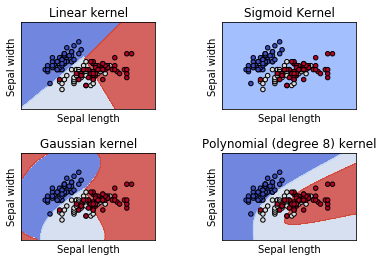

In [41]:
def test():
    import_iris()
    polynomial_kernel()
    gaussian_kernel()
    sigmoid_kernel()
    
test()